In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # data visulization libraray 
%matplotlib inline
import seaborn as sns

In [27]:
df = pd.read_csv(r'D:\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv', encoding = 'unicode_escape')
# to avoid encoder error , use unicode_escape.

A UnicodeDecodeError in Python, particularly when working with pandas, usually occurs when trying to read a file or data that contains non-UTF-8 encoded characters without specifying the correct encoding.

In [28]:
df.shape 

(11251, 15)

In [29]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [31]:
#drop unrelated / blank columns
df.drop(['Status', 'unnamed1'], axis = 1 , inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [33]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


here we are finding null values it most important part of data cleaning process in python but lokking above data we cant understand. false indicating that there are some values it is not null.

In [34]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [35]:
df.shape

(11251, 13)

In [36]:
#drop the null values
df.dropna(inplace = True)

In [37]:
df.shape

(11239, 13)

Amount column is in float(decimal) so we want to change the data type so we did it using .astype('datatype')

In [38]:
#change the data type 
df['Amount'] = df['Amount'].astype('int')

In [39]:
df['Amount'].dtypes

dtype('int32')

In [40]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [41]:
#rename the column
df.rename(columns = {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [42]:
# describe method returns description of the data in the dataframe(i.e, mean std, count)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


 exploratory data anlaysis 

Gender 

In [43]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

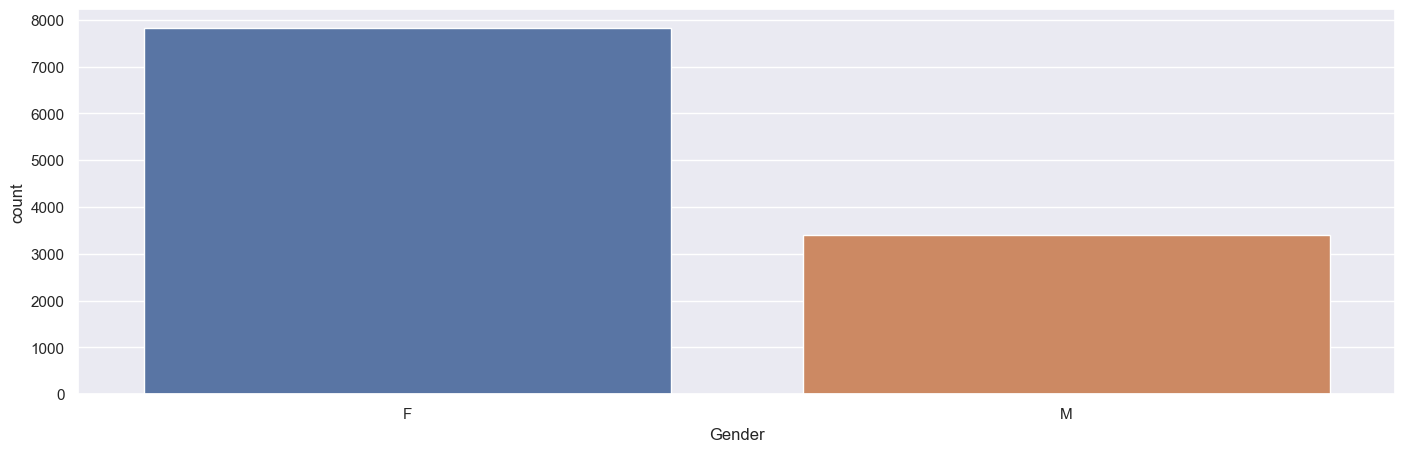

In [44]:
# using seaborn for data visulation here we can see that gender column has displyed using countplot
# normaly we can put we can use seaborn like this 
sns.countplot(x = 'Gender', data = df, hue='Gender')

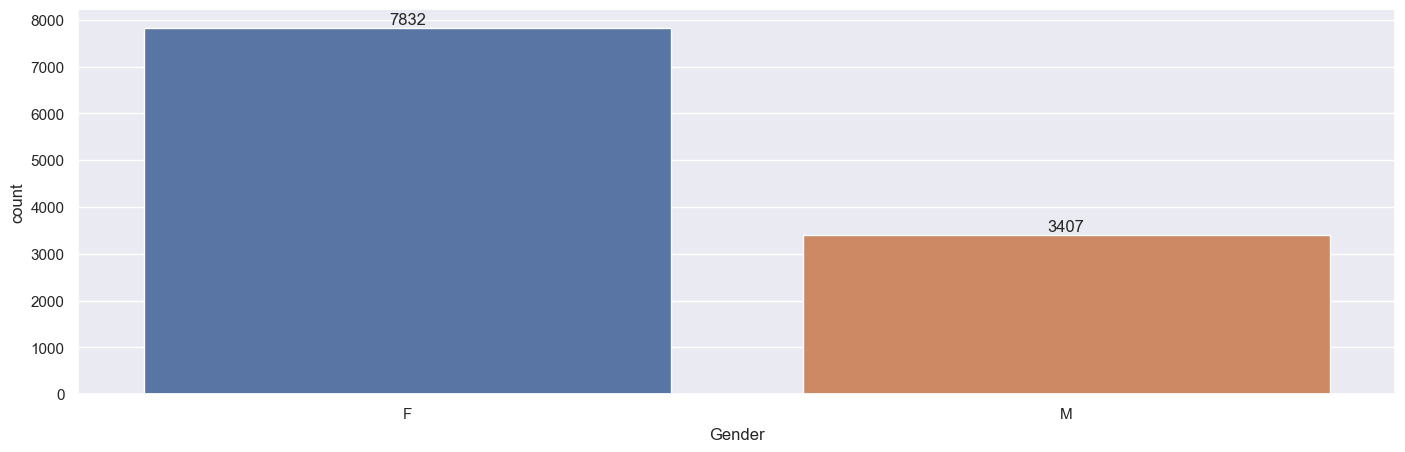

In [45]:
ax = sns.countplot(x = 'Gender', data = df, hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
# here we just craete containers where it gives me total amount about male and female.    

In [46]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

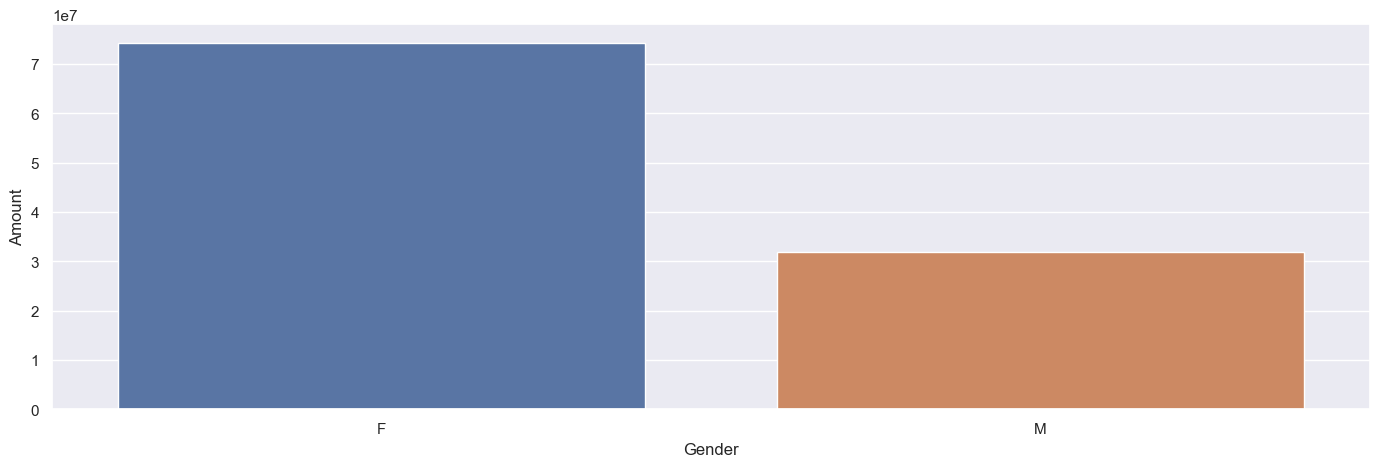

In [47]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen, hue = 'Gender')

From above graph we can understand that female purchasing power is more than males. that means most of the buyers are Female.

Age group

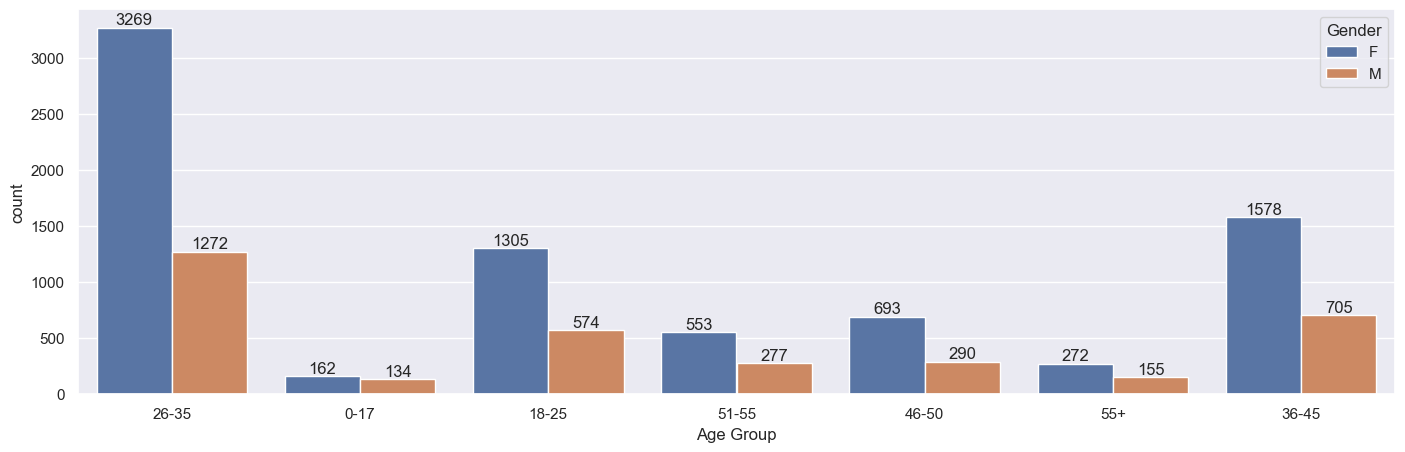

In [48]:
ax = sns.countplot(x = 'Age Group', data = df, hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
# anlayzing the age-group of buyers in the basis of Gender.    

<Axes: xlabel='Age Group', ylabel='Amount'>

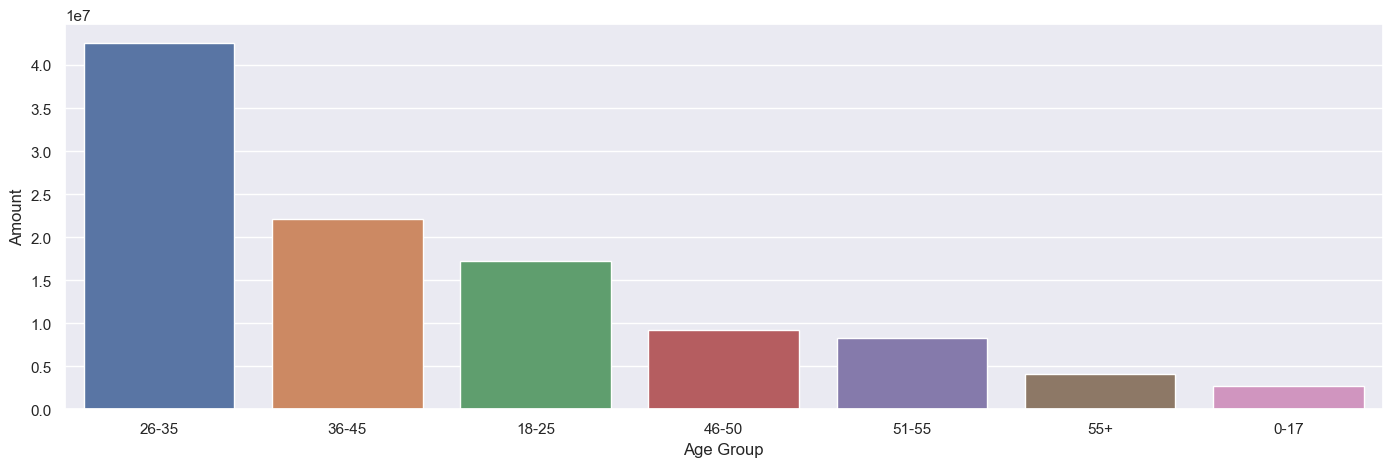

In [49]:
# total amount vs age group
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age, hue = 'Age Group')

from above graph we can see that most of the buyers are Females in between the 26-35 Age-group

state

<Axes: xlabel='State', ylabel='Orders'>

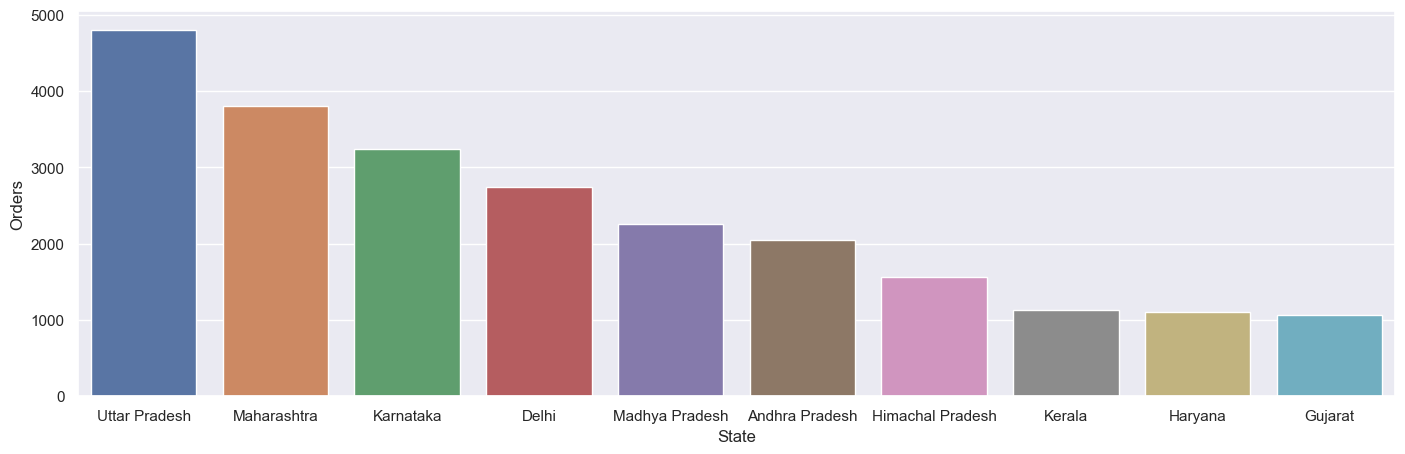

In [51]:
# top 10 sales among the states
sales_states = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

# Plotting the data
sns.set(rc={'figure.figsize': (17, 5)})
sns.barplot(x='State', y='Orders', data=sales_states, hue='State')


In [ ]:
#total amount/sales from top - 10 
sales_states = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_states, x = 'State', y = 'Amount', hue = 'State')

from aboove graphs we can see that most of the ordes are form uttar pradesh, Maharashtra , karnataka respectviley.

Martial status

In [ ]:
df.columns

In [ ]:
ax = sns.countplot(data = df, x =  'Marital_Status', hue =  'Marital_Status')
sns.set(rc={'figure.figsize':(7,2)})
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
#identiying from married couple who spent the money based on gender
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize': (7, 5)})
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')

breakdown of spending by gender within each marital status group
from above graph we can see that most of the buyers are married(women) and they have high purchasing power.

Occupation

In [ ]:
df.columns

In [ ]:
sns.set(rc={'figure.figsize':(22,5)})
ax = sns.countplot(data = df, x = 'Occupation', hue = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(data=sales_state, x ='Occupation', y='Amount', hue = 'Occupation')

from above graph most of the buyers are from IT sector, Helathcare, Aviation.

product catogory

In [ ]:
sns.set(rc={'figure.figsize':(27,7)})
ax = sns.countplot(data = df, x = 'Product_Category', hue = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(data=sales_state, x ='Product_Category', y='Amount', hue = 'Product_Category')

 from above graphs we can see that most of the sold products are food, clothing and electronics category

In [ ]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(data=sales_state, x ='Product_ID', y='Orders', hue = 'Product_ID')

married women age group 26-25 yrs from UP, Maharaeshtra and karnataka working in It, Healthcare and Aviation are more likley to buy products from food, clothing and Electronics category.